/mnt/batch/tasks/shared/LS_root/mounts/clusters/b001-dl/code/Users/5b001/DL3_20241006/ch05
/mnt/batch/tasks/shared/LS_root/mounts/clusters/b001-dl/code/Users/5b001/DL3_20241006


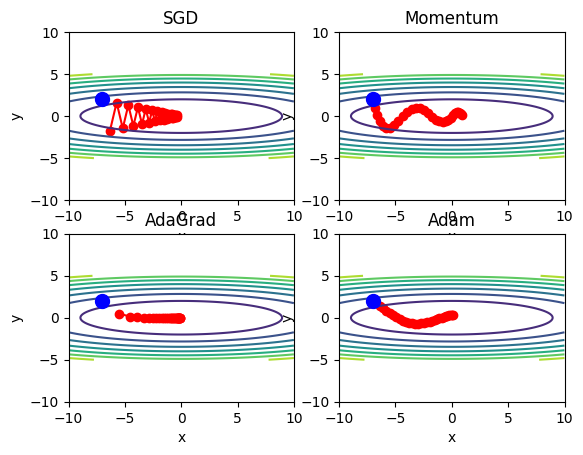

In [1]:
import os, sys
print(os.getcwd())  # 현재 작업 디렉토리 출력
current_dir = os.path.dirname(os.path.abspath("/mnt/batch/tasks/shared/LS_root/mounts/clusters/b001-dl/code/Users/5b001/DL3_20241006/common"))  # 현재 파일의 디렉토리 경로 가져오기
print(current_dir)  # 디렉토리 경로 출력
os.chdir(current_dir)  # 현재 디렉토리로 변경

import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict  # 순서를 유지한 딕셔너리 사용
from common.optimizer import *  # Optimizer 관련 모듈 import

# 미분 가능한 함수 f(x, y) 정의
def f(x, y):
    return x**2 / 20.0 + y**2  # 간단한 이차 함수 (비용 함수 역할)

# f(x, y)에 대한 편미분 함수 정의
def df(x, y):
    return x / 10.0, 2.0 * y  # f(x, y)의 편미분 값 계산

# 초기 파라미터 설정
init_pos = (-7.0, 2.0)  # 초기 위치 (x, y)
params = {}  # 파라미터 저장 딕셔너리
params['x'], params['y'] = init_pos[0], init_pos[1]  # 초기 위치 저장
grads = {}  # 기울기 저장 딕셔너리
grads['x'], grads['y'] = 0, 0  # 초기 기울기 값 0으로 설정

# Optimizer를 종류별로 OrderedDict에 저장
optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)  # SGD Optimizer 생성
optimizers["Momentum"] = Momentum(lr=0.1)  # Momentum Optimizer 생성
optimizers["AdaGrad"] = AdaGrad(lr=1.5)  # AdaGrad Optimizer 생성
optimizers["Adam"] = Adam(lr=0.3)  # Adam Optimizer 생성

idx = 1  # 그래프의 인덱스

# Optimizer 별로 기울기를 계산하고 파라미터를 업데이트하는 과정
for key in optimizers:
    optimizer = optimizers[key]  # 각 Optimizer 선택
    x_history = []  # x 좌표의 변화를 기록할 리스트
    y_history = []  # y 좌표의 변화를 기록할 리스트
    params['x'], params['y'] = init_pos[0], init_pos[1]  # 파라미터 초기화

    # 30번 반복하며 파라미터 업데이트
    for i in range(30):
        # 편미분 값 계산
        grads['x'], grads['y'] = df(params['x'], params['y'])
        # Optimizer를 사용하여 파라미터 업데이트
        optimizer.update(params, grads)
        # 각 좌표의 변화 기록
        x_history.append(params['x'])
        y_history.append(params['y'])

    # 그래프 그리기 준비
    x = np.arange(-10, 10, 0.01)  # x 좌표 범위 설정
    y = np.arange(-5, 5, 0.01)  # y 좌표 범위 설정
    X, Y = np.meshgrid(x, y)  # 2차원 평면 그리드 생성
    Z = f(X, Y)  # 등고선 그릴 데이터 생성

    # 플롯 설정
    plt.subplot(2, 2, idx)  # 2x2 서브플롯 중 하나 선택
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")  # Optimizer 별로 변화 기록을 그리기
    plt.contour(X, Y, Z)  # 등고선 그래프 추가
    plt.xlim(-10, 10)  # x 축 제한
    plt.ylim(-10, 10)  # y 축 제한
    plt.plot(init_pos[0], init_pos[1], 'o', color='blue', markersize=10)  # 초기 위치 표시
    plt.title(key)  # 서브플롯의 제목에 Optimizer 이름 표시
    plt.xlabel("x")  # x축 레이블
    plt.ylabel("y")  # y축 레이블

plt.show()  # 그래프 출력
